# IS 362 - Project 1 

In [1]:
# import pandas, NumPy, and matplotlib

import pandas as pan
import numpy as num
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

%matplotlib inline

# Read the information from your .CSV file into pandas.

al = pan.read_csv ('Project1.csv')

## Data

The data set that will be analyzed for this project is displayed below. The table displays the arrival delays for two airlines, Alaska and Am West, across five destinations. 

In [2]:
al

,destination,alaska_on_time,alaska_delayed,amwest_on_time,amwest_delayed
0,Los Angeles,497,62,694,117
1,Phoenix,221,12,4840,415
2,San Diego,212,20,383,65
3,San Francisco,503,102,320,129
4,Seattle,1841,305,201,61


## Analysis

### Part 1

The analysis below involves calculating the total number of flights and the percentage of flights that were delayed for both airlines. 

In [3]:
# Calculate the total number of Alaska flights

al.alaska_flights = al.alaska_on_time.sum() + al.alaska_delayed.sum()
al.alaska_flights

3775

In [4]:
# Calculate delayed flight percentage for Alaska

(al.alaska_delayed.sum() / al.alaska_flights * 100).round(2)

13.27

In [5]:
# Calculate the total number of Am West flights

al.amwest_flights = al.amwest_on_time.sum() + al.amwest_delayed.sum()
al.amwest_flights

7225

In [6]:
# Calculate delayed flight percentage for Am West

(al.amwest_delayed.sum() / al.amwest_flights * 100).round(2)

10.89

### Part 2

The analysis below involves calculating the percentage of flights that were delayed for each individual city by airline.

In [7]:
# Create a panda series object to hold the Alaska delayed flight percentages for each city

alaska_percent_delayed = pan.Series(al.alaska_delayed / (al.alaska_on_time + al.alaska_delayed) * 100)
alaska_percent_delayed.round(2)

0    11.09
1     5.15
2     8.62
3    16.86
4    14.21
dtype: float64

In [8]:
# Create a panda series object to hold the Am West delayed flight percentages for each city

amwest_percent_delayed = pan.Series(al.amwest_delayed / (al.amwest_on_time + al.amwest_delayed) * 100)
amwest_percent_delayed.round(2)

0    14.43
1     7.90
2    14.51
3    28.73
4    23.28
dtype: float64

In [9]:
al['alaska_percent_delayed'] = alaska_percent_delayed.round(2)
al['amwest_percent_delayed'] = amwest_percent_delayed.round(2)
al

,destination,alaska_on_time,alaska_delayed,amwest_on_time,amwest_delayed,alaska_percent_delayed,amwest_percent_delayed
0,Los Angeles,497,62,694,117,11.09,14.43
1,Phoenix,221,12,4840,415,5.15,7.90
2,San Diego,212,20,383,65,8.62,14.51
3,San Francisco,503,102,320,129,16.86,28.73
4,Seattle,1841,305,201,61,14.21,23.28


Text(0.5, 0, 'Cities')

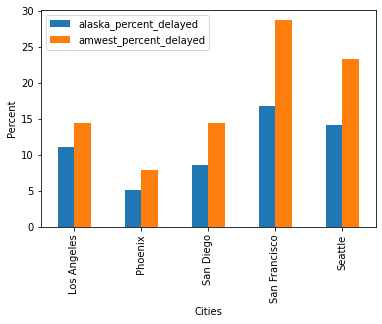

In [10]:
# Plot the delayed flight percentage for each city

al.plot.bar(x='destination', y=['alaska_percent_delayed', 'amwest_percent_delayed'])
plt.ylabel('Percent')
plt.xlabel('Cities')

## Results

#### Below is the result of the Part 1 analysis:

Alaska Airlines flew a total of 3775 flights. Of those 3775 flights, 13.27% were delayed.

Am West Airlines flew a total of 7225 flights. Of those 7225 flights, 10.89% were delayed.

#### Below is the result of the Part 2 analysis:

Am West had more delayed flights than Alaska in each of the five destinations.

## Conclusion

Based on the Part 1 analysis, it might make sense to conclude that it would be better to fly Am West as it is has an overall lower percentage of delayed flights. However, when looking at arrival delays for each individual city in Part 2, it's clear that Alaska might be the better carrier to fly as it has lower delayed flight percentages than Am West in all five cities.